<a href="https://colab.research.google.com/github/LynXeEn/.NET-Core-Integrated-Systems/blob/master/VNP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [3]:
import tsfresh
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
import pandas as pd

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
natural_gas_df = pd.read_csv('/content/drive/MyDrive/Datasets for June Project/Natural Gas.csv')
gold_df = pd.read_csv('/content/drive/MyDrive/Datasets for June Project/Gold.csv')
crude_oil_df = pd.read_csv('/content/drive/MyDrive/Datasets for June Project/Crude Oil.csv')
btc_usd_df = pd.read_csv('/content/drive/MyDrive/Datasets for June Project/BTC-USD.csv')
aapl_df = pd.read_csv('/content/drive/MyDrive/Datasets for June Project/AAPL.csv')

In [5]:
natural_gas_df.head()

Date  Price   Open   High    Low     Vol. Change %
0  07/05/2024  2.319  2.421  2.440  2.315      NaN   -2.19%
1  07/04/2024  2.371  2.431  2.439  2.335      NaN   -1.94%
2  07/03/2024  2.418  2.466  2.480  2.410  125.89K   -0.70%
3  07/02/2024  2.435  2.476  2.484  2.415  154.26K   -1.74%
4  07/01/2024  2.478  2.576  2.602  2.471  181.93K   -4.73%

In [6]:
def preprocess_df(df, date_col, value_col, rename_dict=None):
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.rename(columns={date_col: 'Date', value_col: 'Price'})
    if rename_dict:
        df = df.rename(columns=rename_dict)
    return df[['Date', 'Price']]

In [7]:
natural_gas_df = preprocess_df(natural_gas_df, 'Date', 'Price')
gold_df = preprocess_df(gold_df, 'Date', 'Price')
crude_oil_df = preprocess_df(crude_oil_df, 'Date', 'Price')
btc_usd_df = preprocess_df(btc_usd_df, 'Date', 'Close')
aapl_df = preprocess_df(aapl_df, 'Date', 'Close')

In [8]:
def ensure_ascending_order(df, date_col='Date'):
    if not df[date_col].is_monotonic_increasing:
        df = df.sort_values(by=date_col)
    return df

In [9]:
natural_gas_df = ensure_ascending_order(natural_gas_df)
gold_df = ensure_ascending_order(gold_df)
crude_oil_df = ensure_ascending_order(crude_oil_df)
btc_usd_df = ensure_ascending_order(btc_usd_df)
aapl_df = ensure_ascending_order(aapl_df)

In [10]:
natural_gas_df.head()

Date  Price
1192 2020-01-01  2.179
1191 2020-01-02  2.122
1190 2020-01-03  2.130
1189 2020-01-06  2.135
1188 2020-01-07  2.162

In [11]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1134 non-null   datetime64[ns]
 1   Price   1134 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.8 KB


In [12]:
natural_gas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 1192 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1193 non-null   datetime64[ns]
 1   Price   1193 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.0 KB


In [13]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137 entries, 1136 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1137 non-null   datetime64[ns]
 1   Price   1137 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 26.6+ KB


In [14]:
gold_df['Price'] = gold_df['Price'].str.replace(',', '')
gold_df['Price'] = gold_df['Price'].astype(float)


In [15]:
gold_df['Price']

1136    1528.1
1135    1552.4
1134    1568.8
1133    1574.3
1132    1560.2
         ...  
4       2338.9
3       2333.4
2       2369.4
1       2364.6
0       2397.7
Name: Price, Length: 1137, dtype: float64

In [16]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137 entries, 1136 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1137 non-null   datetime64[ns]
 1   Price   1137 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.6 KB


In [17]:
gold_df['Price'].isnull().sum()

0

In [18]:
display(natural_gas_df.head(), gold_df.head(), crude_oil_df.head(), btc_usd_df.head(), aapl_df.head())

Date  Price
1192 2020-01-01  2.179
1191 2020-01-02  2.122
1190 2020-01-03  2.130
1189 2020-01-06  2.135
1188 2020-01-07  2.162

Date   Price
1136 2020-01-02  1528.1
1135 2020-01-03  1552.4
1134 2020-01-06  1568.8
1133 2020-01-07  1574.3
1132 2020-01-08  1560.2

Date  Price
1191 2020-01-01  61.33
1190 2020-01-02  61.18
1189 2020-01-03  63.05
1188 2020-01-06  63.27
1187 2020-01-07  62.70

Date        Price
0 2020-01-01  7200.174316
1 2020-01-02  6985.470215
2 2020-01-03  7344.884277
3 2020-01-04  7410.656738
4 2020-01-05  7411.317383

Date      Price
0 2020-01-02  75.087502
1 2020-01-03  74.357498
2 2020-01-06  74.949997
3 2020-01-07  74.597504
4 2020-01-08  75.797501

In [19]:
natural_gas_df.isnull().sum()

Date     0
Price    0
dtype: int64

In [20]:
gold_df.isnull().sum()

Date     0
Price    0
dtype: int64

In [21]:
crude_oil_df.isnull().sum()

Date     0
Price    0
dtype: int64

In [22]:
btc_usd_df.isnull().sum()

Date     0
Price    0
dtype: int64

In [23]:
aapl_df.isnull().sum()

Date     0
Price    0
dtype: int64

In [24]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1134 non-null   datetime64[ns]
 1   Price   1134 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.8 KB


In [25]:
combined_df = pd.concat([
    natural_gas_df.assign(id='Natural Gas'),
    gold_df.assign(id='Gold'),
    crude_oil_df.assign(id='Crude Oil'),
    btc_usd_df.assign(id='Bitcoin'),
    aapl_df.assign(id='Apple')
])

combined_df = combined_df.rename(columns={'Date': 'time', 'Price': 'value'})

In [26]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6306 entries, 1192 to 1133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    6306 non-null   datetime64[ns]
 1   value   6306 non-null   float64       
 2   id      6306 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 197.1+ KB


In [27]:
combined_df.head()

time  value           id
1192 2020-01-01  2.179  Natural Gas
1191 2020-01-02  2.122  Natural Gas
1190 2020-01-03  2.130  Natural Gas
1189 2020-01-06  2.135  Natural Gas
1188 2020-01-07  2.162  Natural Gas

In [28]:
combined_df.tail()

time       value     id
1129 2024-06-28  210.619995  Apple
1130 2024-07-01  216.750000  Apple
1131 2024-07-02  220.270004  Apple
1132 2024-07-03  221.550003  Apple
1133 2024-07-05  226.339996  Apple

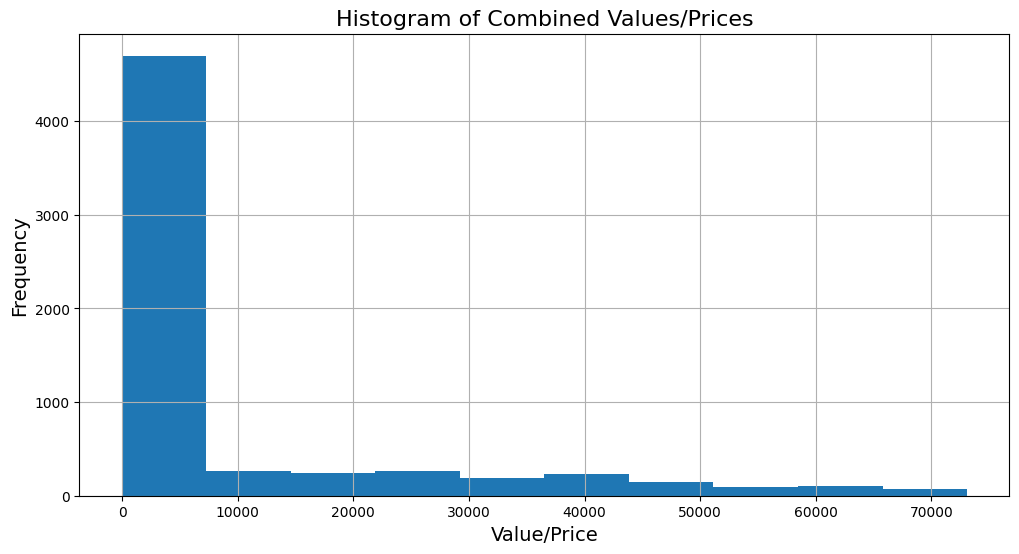

In [29]:
import matplotlib.pyplot as plt

combined_df.hist(column='value', figsize=(12, 6))


plt.xlabel('Value/Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.title('Histogram of Combined Values/Prices', fontsize=16)

plt.show()

In [30]:
combined_df

time       value           id
1192 2020-01-01    2.179000  Natural Gas
1191 2020-01-02    2.122000  Natural Gas
1190 2020-01-03    2.130000  Natural Gas
1189 2020-01-06    2.135000  Natural Gas
1188 2020-01-07    2.162000  Natural Gas
...         ...         ...          ...
1129 2024-06-28  210.619995        Apple
1130 2024-07-01  216.750000        Apple
1131 2024-07-02  220.270004        Apple
1132 2024-07-03  221.550003        Apple
1133 2024-07-05  226.339996        Apple

[6306 rows x 3 columns]

In [31]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6306 entries, 1192 to 1133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    6306 non-null   datetime64[ns]
 1   value   6306 non-null   float64       
 2   id      6306 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 197.1+ KB


In [32]:
combined_df['value'].isnull().sum()

0

In [33]:
combined_df['value'].info()

<class 'pandas.core.series.Series'>
Index: 6306 entries, 1192 to 1133
Series name: value
Non-Null Count  Dtype  
--------------  -----  
6306 non-null   float64
dtypes: float64(1)
memory usage: 98.5 KB


In [34]:
df_long, y = make_forecasting_frame(combined_df['value'], kind=combined_df['id'], max_timeshift=7, rolling_direction=1)

Rolling: 100%|██████████| 1650/1650 [00:23<00:00, 69.99it/s]


In [35]:
df_long.columns

Index(['id', 'time', 'value', 'kind'], dtype='object')

In [36]:
y

(id, 1191)      2.122000
(id, 1190)      2.130000
(id, 1189)      2.135000
(id, 1188)      2.162000
(id, 1187)      2.141000
                 ...    
(id, 1129)    210.619995
(id, 1130)    216.750000
(id, 1131)    220.270004
(id, 1132)    221.550003
(id, 1133)    226.339996
Name: value, Length: 6305, dtype: float64

In [37]:
df_long

id  time         value       kind
0         (id, 0)     0     75.087502      Apple
1         (id, 0)     0   7200.174316    Bitcoin
2         (id, 0)     0     83.160000  Crude Oil
3         (id, 0)     0   2397.700000       Gold
5         (id, 1)     0     75.087502      Apple
...           ...   ...           ...        ...
50302  (id, 1649)  1644  62029.015625    Bitcoin
50303  (id, 1649)  1645  60173.921875    Bitcoin
50304  (id, 1649)  1646  56977.703125    Bitcoin
50305  (id, 1649)  1647  56662.375000    Bitcoin
50306  (id, 1649)  1648  58303.539063    Bitcoin

[48658 rows x 4 columns]

In [38]:
combined_df.head()

time  value           id
1192 2020-01-01  2.179  Natural Gas
1191 2020-01-02  2.122  Natural Gas
1190 2020-01-03  2.130  Natural Gas
1189 2020-01-06  2.135  Natural Gas
1188 2020-01-07  2.162  Natural Gas

In [39]:
df_long.head()

id  time        value       kind
0  (id, 0)     0    75.087502      Apple
1  (id, 0)     0  7200.174316    Bitcoin
2  (id, 0)     0    83.160000  Crude Oil
3  (id, 0)     0  2397.700000       Gold
5  (id, 1)     0    75.087502      Apple

In [40]:
df_long['time'].value_counts()

time
0       39
749     39
755     39
754     39
753     39
        ..
1644     5
1645     4
1646     3
1647     2
1648     1
Name: count, Length: 1649, dtype: int64

In [41]:
df_long['time'].isnull().sum()

0

In [42]:
df_long['time'].value_counts()

time
0       39
749     39
755     39
754     39
753     39
        ..
1644     5
1645     4
1646     3
1647     2
1648     1
Name: count, Length: 1649, dtype: int64

<Axes: >

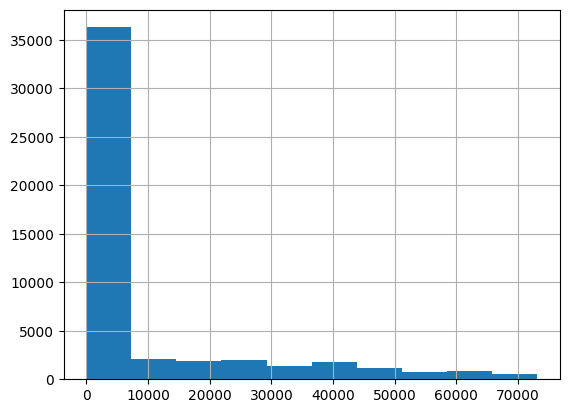

In [43]:
df_long['value'].hist()

In [44]:
extracted_features = extract_features(df_long, column_id="id", column_sort="time", column_value="value")

Feature Extraction: 100%|██████████| 1650/1650 [02:23<00:00, 11.48it/s]


In [45]:
extracted_features

value__variance_larger_than_standard_deviation  \
id 0                                                1.0   
   1                                                1.0   
   2                                                1.0   
   3                                                1.0   
   4                                                1.0   
...                                                 ...   
   1645                                             1.0   
   1646                                             1.0   
   1647                                             1.0   
   1648                                             1.0   
   1649                                             1.0   

         value__has_duplicate_max  value__has_duplicate_min  \
id 0                          0.0                       0.0   
   1                          0.0                       0.0   
   2                          0.0                       0.0   
   3                          0.0                       0.0   
   4                          0.0                       0.0   
...                           ...                       ...   
   1645                       0.0                       0.0   
   1646                       0.0                       0.0   
   1647                       0.0                       0.0   
   1648                       0.0                       0.0   
   1649                       0.0                       0.0   

         value__has_duplicate  value__sum_values  value__abs_energy  \
id 0                      0.0        9756.121818       5.760403e+07   
   1                      0.0       19266.808531       1.120047e+08   
   2                      0.0       29142.293805       1.715788e+08   
   3                      0.0       39046.176047       2.319538e+08   
   4                      0.0       48958.005931       2.923646e+08   
...                       ...                ...                ...   
   1645                   0.0      431182.882813       2.656549e+10   
   1646                   0.0      430545.527344       2.648838e+10   
   1647                   0.0      425918.429688       2.593969e+10   
   1648                   0.0      422260.667969       2.551180e+10   
   1649                   0.0      419676.828126       2.520383e+10   

         value__mean_abs_change  value__mean_change  \
id 0                5518.880377          774.204166   
   1                4389.670445          286.189062   
   2                4182.202316          176.485577   
   3                3847.528477          125.461805   
   4                3645.746885           98.426630   
...                         ...                 ...   
   1645              905.499349          202.956380   
   1646             1082.427734         -238.479818   
   1647             1401.020182         -557.072266   
   1648             1359.034505         -704.167318   
   1649             1334.076172         -729.125651   

         value__mean_second_derivative_central  value__median  ...  \
id 0                              -1202.636703    1240.430000  ...   
   1                               -346.030487      83.940000  ...   
   2                               -201.648617      83.910000  ...   
   3                               -358.892457      83.880000  ...   
   4                               -277.216004      83.630000  ...   
...                                        ...            ...  ...   
   1645                            -161.648828   61604.800781  ...   
   1646                             -57.042969   61604.800781  ...   
   1647                            -376.346094   60887.378906  ...   
   1648                            -210.624219   60887.378906  ...   
   1649                             146.747656   60173.921875  ...   

         value__fourier_entropy__bins_5  value__fourier_entropy__bins_10  \
id 0                           0.636514                         0.636514   
   1                           1.609

In [46]:
extracted_features.isnull().sum()

value__variance_larger_than_standard_deviation                 0
value__has_duplicate_max                                       0
value__has_duplicate_min                                       0
value__has_duplicate                                           0
value__sum_values                                              0
                                                            ... 
value__permutation_entropy__dimension_5__tau_1                 1
value__permutation_entropy__dimension_6__tau_1                 1
value__permutation_entropy__dimension_7__tau_1                 1
value__query_similarity_count__query_None__threshold_0.0    1650
value__mean_n_absolute_max__number_of_maxima_7               458
Length: 783, dtype: int64

In [47]:
print(extracted_features.isnull().sum())

value__variance_larger_than_standard_deviation                 0
value__has_duplicate_max                                       0
value__has_duplicate_min                                       0
value__has_duplicate                                           0
value__sum_values                                              0
                                                            ... 
value__permutation_entropy__dimension_5__tau_1                 1
value__permutation_entropy__dimension_6__tau_1                 1
value__permutation_entropy__dimension_7__tau_1                 1
value__query_similarity_count__query_None__threshold_0.0    1650
value__mean_n_absolute_max__number_of_maxima_7               458
Length: 783, dtype: int64


In [48]:
from tsfresh.utilities.dataframe_functions import impute

imputed_features = impute(extracted_features)

/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__fft_coefficient__attr_"real"__coeff_20'
 'value__fft_coefficient__attr_"real"__coeff_21'
 'value__fft_coefficient__attr_"real"__coeff_22'
 'value__fft_coefficient__attr_"real"__coeff_23'
 'value__fft_coefficient__attr_"real"__coeff_24'
 'value__fft_coefficient__attr_"real"__coeff_25'
 'value__fft_coefficient__attr_"real"__coeff_26'
 'value__fft_coefficient__attr_"real"__coeff_27'
 'value__fft_coefficient__attr_"real"__coeff_28'
 'value__fft_coefficient__attr_"real"__coeff_29'
 'value__fft_coefficient__attr_"real"__coeff_30'
 'value__fft_coefficient__attr_"real"__coeff_31'
 'value__fft_coefficient__attr_"real"__coeff_32'
 'value__fft_coefficient__attr_"real"__coeff_33'
 'value__fft_coefficient__attr_"real"__coeff_34'
 'value__fft_coefficient__attr_"real"__coeff_35'
 'value__fft_coefficient__attr_"real"__coeff_36'
 'value__fft_coefficient__attr_"real"__coeff_37'
 'va

In [49]:
# TODO delete the column with 100% null values

In [50]:
null_columns = extracted_features.columns[extracted_features.isnull().all()]

In [51]:
null_columns

Index([], dtype='object')

In [52]:
import plotly.express as px
import plotly.graph_objects as go

# Plotly interactive visualizations
fig = go.Figure()

for name, df in [('Natural Gas', natural_gas_df), ('Gold', gold_df), ('Crude Oil', crude_oil_df), ('Bitcoin', btc_usd_df), ('Apple', aapl_df)]:
    fig.add_trace(go.Scatter(x=df['Date'], y=df_long['value'], mode='lines', name=name))

fig.update_layout(title='Time Series Data Comparison', xaxis_title='Date', yaxis_title='Price')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [53]:
print(df_long.head())
print(y.head())

In [54]:
print(df_long.index)
print(y.index)


        id  time        value       kind
0  (id, 0)     0    75.087502      Apple
1  (id, 0)     0  7200.174316    Bitcoin
2  (id, 0)     0    83.160000  Crude Oil
3  (id, 0)     0  2397.700000       Gold
5  (id, 1)     0    75.087502      Apple
(id, 1191)    2.122
(id, 1190)    2.130
(id, 1189)    2.135
(id, 1188)    2.162
(id, 1187)    2.141
Name: value, dtype: float64
Index([    0,     1,     2,     3,     5,     7,     9,    11,    13,     6,
       ...
       50296, 50297, 50298, 50300, 50301, 50302, 50303, 50304, 50305, 50306],
      dtype='int64', length=48658)
Index([('id', 1191), ('id', 1190), ('id', 1189), ('id', 1188), ('id', 1187),
       ('id', 1186), ('id', 1185), ('id', 1184), ('id', 1183), ('id', 1182),
       ...
       ('id', 1124), ('id', 1125), ('id', 1126), ('id', 1127), ('id', 1128),
       ('id', 1129), ('id', 1130), ('id', 1131), ('id', 1132), ('id', 1133)],
      dtype='object', length=6305)


In [55]:
aligned_features = imputed_features.loc[y.index]


In [56]:
from sklearn.model_selection import train_test_split

assert len(aligned_features) == len(y), "Features and target must have the same number of samples"

X_train, X_test, y_train, y_test = train_test_split(aligned_features, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1518817244202754.0


In [59]:
!pip install plotly

In [60]:
import plotly.express as px

importances = model.coef_
feature_names = imputed_features.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

fig_ts = px.line(combined_df, x='time', y='value', color='id', title='Time Series Data')
fig_ts.show()

fig_importance = px.bar(feature_importance, x='Feature', y='Importance', title='Feature Importance')
fig_importance.update_xaxes(title_text='Feature')
fig_importance.update_yaxes(title_text='Importance')
fig_importance.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [61]:
!pip install bokeh


In [62]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
import pandas as pd

output_notebook()

source = ColumnDataSource(combined_df)
p = figure(x_axis_type='datetime', title='Time Series Data')
p.line(x='time', y='value', source=source, legend_field='id')
show(p)

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
p2 = figure(x_range=feature_importance['Feature'], title='Feature Importance', toolbar_location=None)
p2.vbar(x='Feature', top='Importance', source=feature_importance, width=0.9)
p2.xaxis.major_label_orientation = 1.2
show(p2)


In [63]:
!pip install matplotlib


In [64]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

output_notebook()

unique_ids = combined_df['id'].unique()
num_ids = len(unique_ids)

def generate_colors(num_colors):
    """Generate a list of distinct colors."""
    cmap = plt.get_cmap('tab20')  # Choose a colormap
    return [cmap(i / num_colors) for i in range(num_colors)]

palette = generate_colors(num_ids)

palette_hex = [mcolors.to_hex(color) for color in palette]

source = ColumnDataSource(combined_df)

p = figure(x_axis_type='datetime', title='Time Series Data', width=800, height=400)

line_styles = ['solid', 'dashed', 'dotted', 'dashdot']
markers = ['circle', 'square', 'triangle', 'diamond']

line_styles *= (num_ids // len(line_styles)) + 1
markers *= (num_ids // len(markers)) + 1

for i, id_value in enumerate(unique_ids):
    df_id = combined_df[combined_df['id'] == id_value]
    p.line(df_id['time'], df_id['value'], legend_label=str(id_value),
           line_width=2, line_dash=line_styles[i % len(line_styles)],
           color=palette_hex[i % len(palette_hex)])
    p.scatter(df_id['time'], df_id['value'], legend_label=str(id_value),
              marker=markers[i % len(markers)], size=8, color=palette_hex[i % len(palette_hex)])

p.legend.title = 'ID'
p.legend.label_text_font_size = '10pt'
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'
p.xaxis.major_label_orientation = 1.2

show(p)

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_importance.nlargest(10, 'Importance')  # Select top 10 features

p2 = figure(x_range=top_features['Feature'].astype(str), title='Feature Importance', toolbar_location=None, width=800, height=400)
p2.vbar(x='Feature', top='Importance', source=top_features, width=0.9, color='blue')
p2.xaxis.major_label_orientation = 1.2
p2.yaxis.axis_label = 'Importance'
p2.xaxis.axis_label = 'Feature'

show(p2)


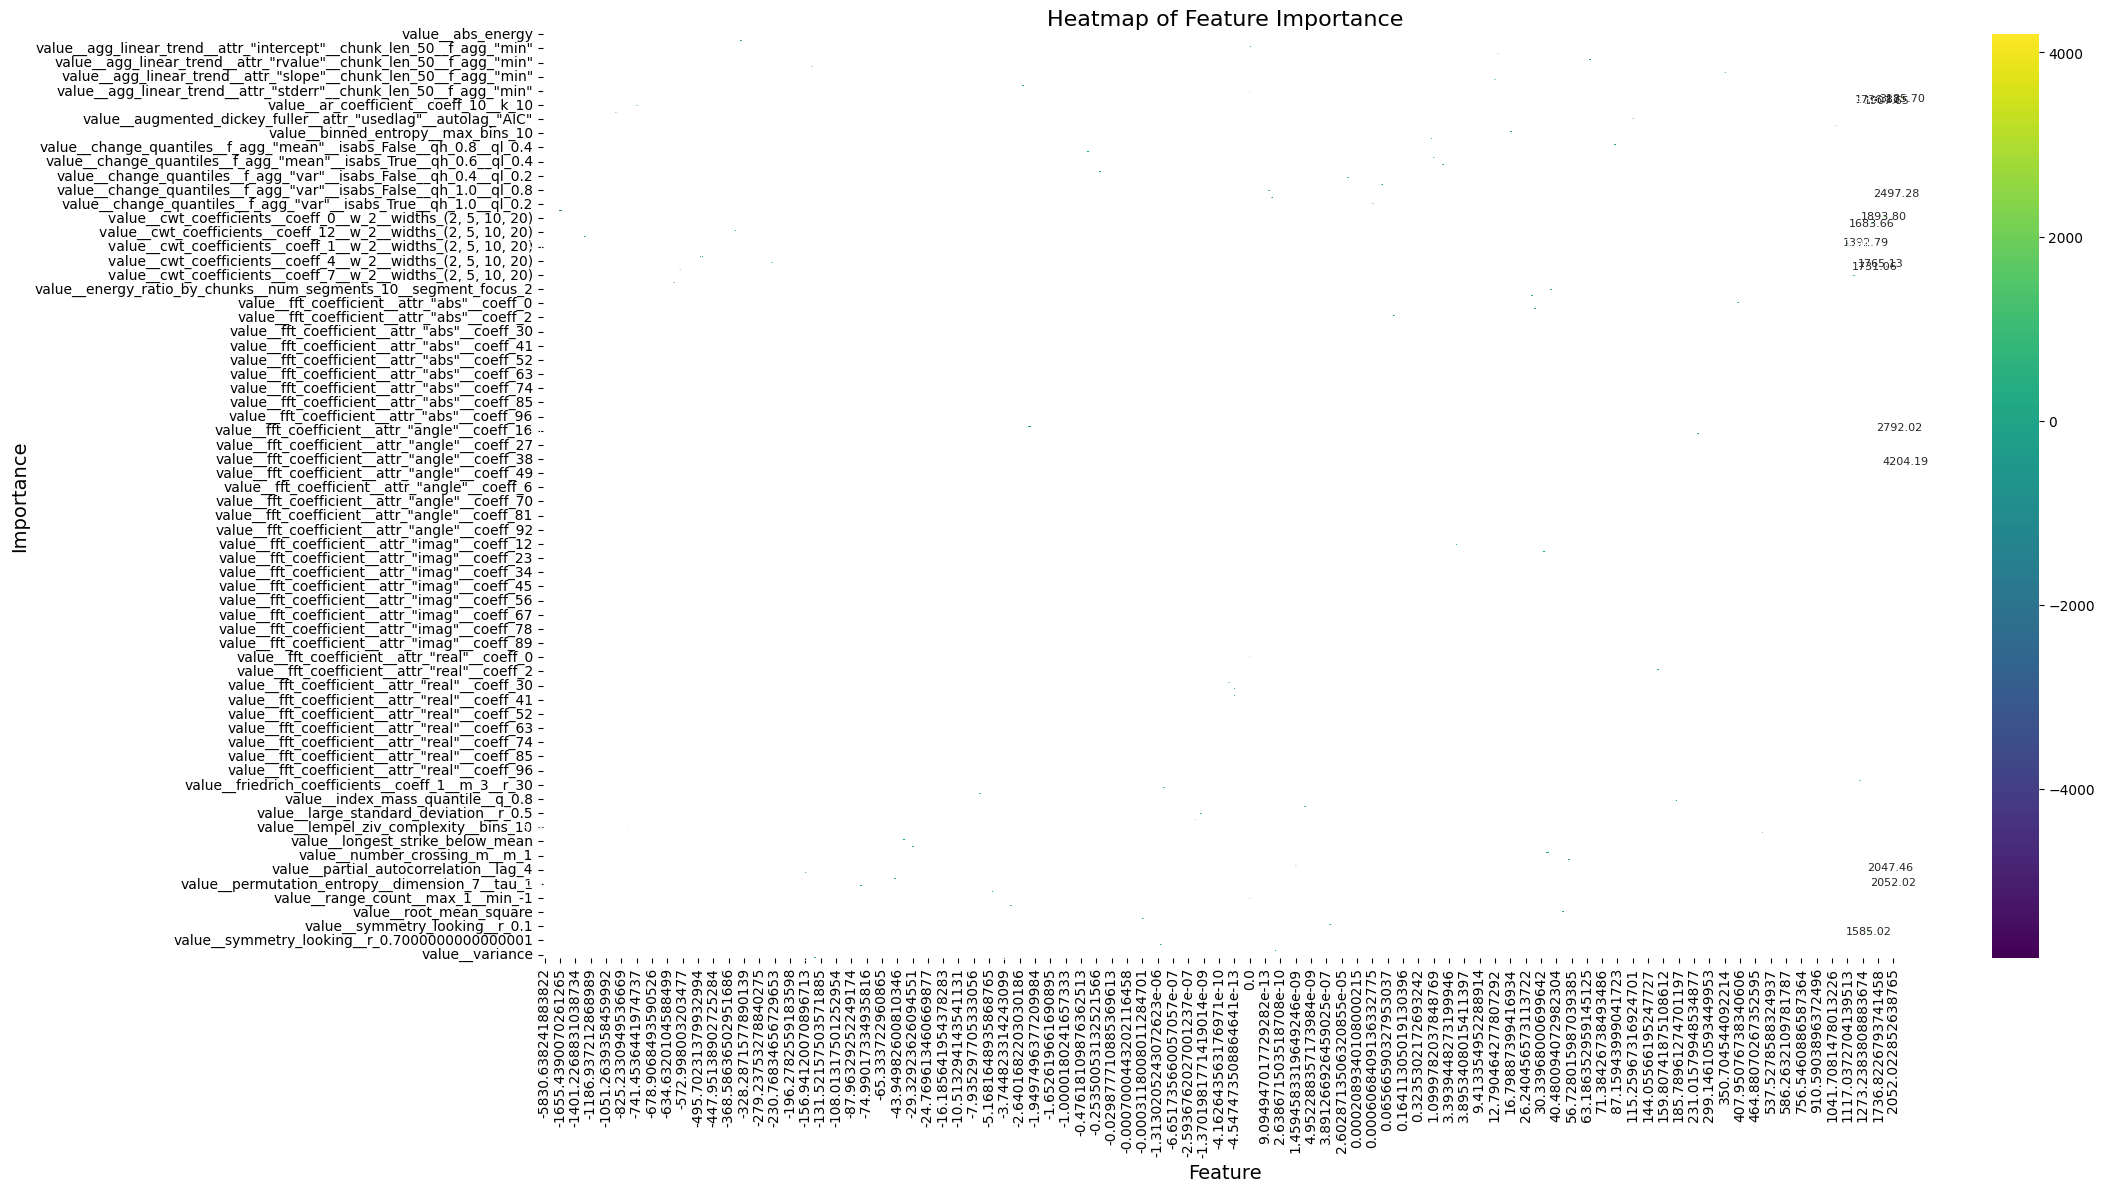

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.pivot(index='Feature', columns='Importance', values='Importance')

plt.figure(figsize=(22, 12))
heatmap = sns.heatmap(
    feature_importance,
    annot=True,
    cmap='viridis',
    cbar=True,
    fmt='.2f',
    linewidths=.5,
    annot_kws={"size": 8}
)


plt.title('Heatmap of Feature Importance', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)


plt.show()


In [66]:
print(feature_importance.columns)


Index([ -5830.638241883822, -2938.9428707418647, -2385.7800460870967,
        -2072.027241918338, -1666.5925063690975, -1655.4390070261265,
         -1626.54578048617, -1495.5658379556398, -1465.9936523330814,
       -1450.2350138766685,
       ...
        1736.8226793741458,  1765.1290921204782,  1893.8027004898897,
        1907.6513872372252,  2047.4601313986464,   2052.022852638765,
          2497.27624426618,    2792.02287978019,  3185.6970497487796,
          4204.18578812986],
      dtype='float64', name='Importance', length=445)


In [67]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

print(feature_importance.head())


                                          Feature   Importance
0  value__variance_larger_than_standard_deviation    -3.936721
1                        value__has_duplicate_max  -106.295775
2                        value__has_duplicate_min -1257.629280
3                            value__has_duplicate   123.768769
4                               value__sum_values   159.807419


In [68]:
top_features = feature_importance.nlargest(10, 'Importance').reset_index(drop=True)


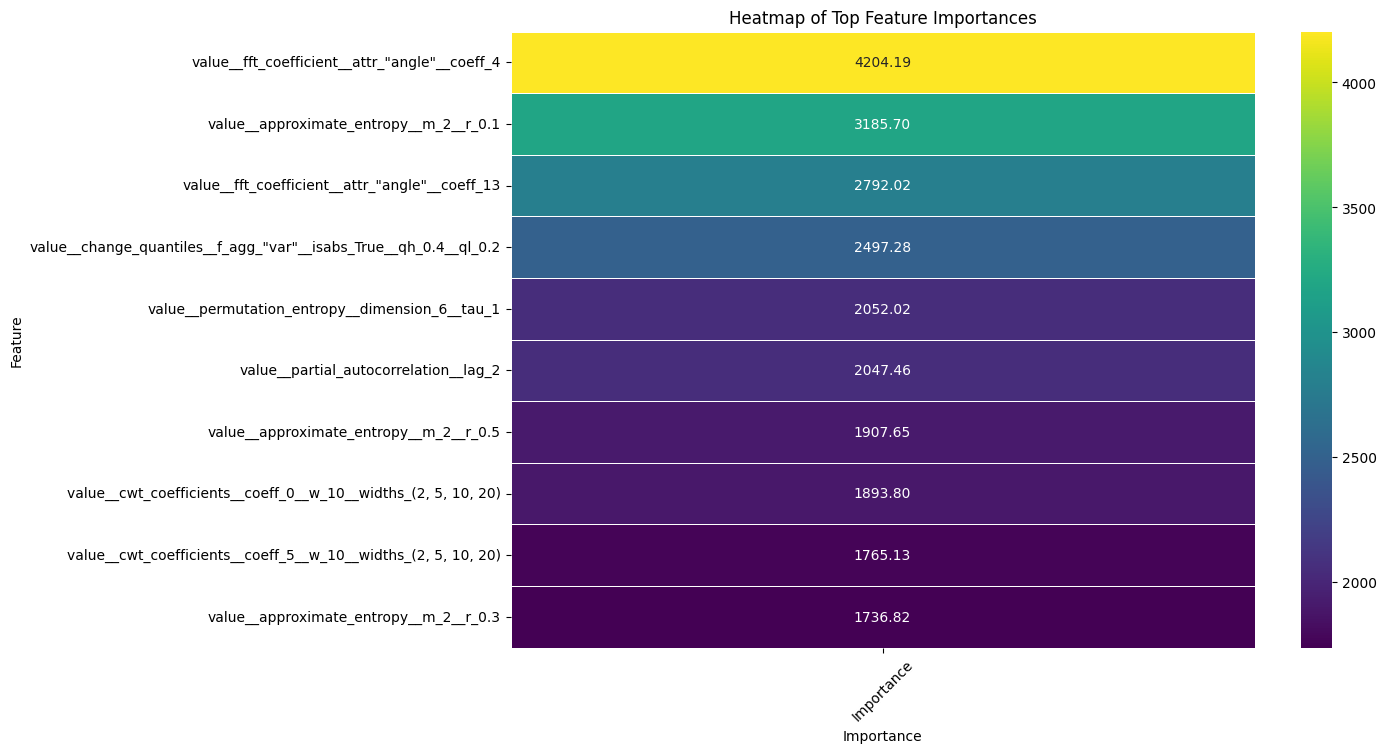

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = top_features.set_index('Feature')
plt.figure(figsize=(12, 8))
sns.heatmap(top_features, annot=True, cmap='viridis', cbar=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [70]:
import altair as alt
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

top_features = feature_importance.nlargest(10, 'Importance')

chart = alt.Chart(top_features).mark_bar().encode(
    x=alt.X('Feature:N', sort='-y', title='Feature'),
    y=alt.Y('Importance:Q', title='Importance'),
    tooltip=['Feature', 'Importance']
).properties(
    title='Top 10 Features by Importance',
    width=600,
    height=400
)

chart.display()


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)